<a href="https://colab.research.google.com/github/aggelospsiris/NB-KNN-SMV/blob/main/knn_best_k_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive 
drive.mount('/drive')
df=pd.read_csv('/drive/My Drive/Colab Notebooks/decision_theory/processed_data.csv')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
# Split into input and output
X = df.values[:, :-1]
Y = df.values[:, -1]
#normalization between [-1 1]
a = np.array(X)
X = 2.*(a - np.min(a))/np.ptp(a)-1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#SEARCH FOR THE BEST C IN [1-200] WITH STEP=5 AND USING LINEAR 
#split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

acc_list = []

# Calculating MAE error for K values between 3,20
for i in range(3,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc = accuracy_score(y_test, pred_i)
    acc_list.append(acc)

Text(0, 0.5, 'Accuracy')

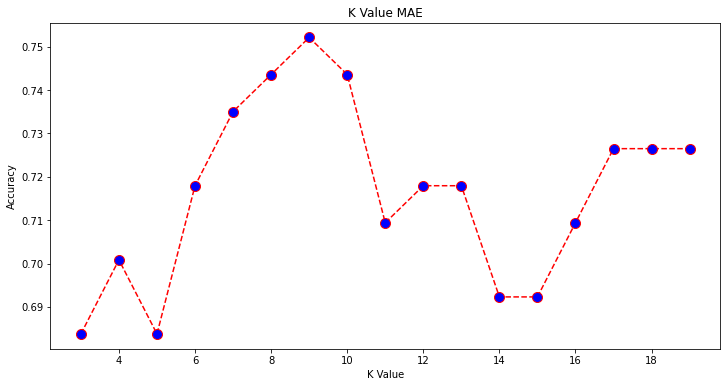

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(3,20), acc_list, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Accuracy')